In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection.validation import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from surprise.prediction_algorithms.matrix_factorization import NMF,SVD

In [21]:
dataset = pd.read_csv('ml-latest-small/ratings.csv')
dataset.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [22]:
# Question 1
num_movies = dataset['movieId'].nunique()
num_users = dataset['userId'].nunique()
sparsity = dataset.shape[0]/(num_users*num_movies)
print("Sparsity: ", sparsity)

Sparsity:  0.016439141608663475


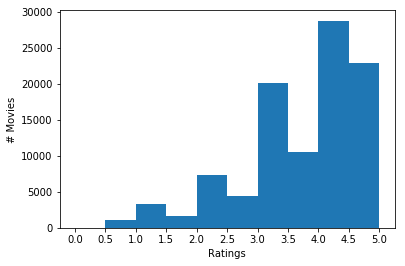

In [23]:
# Question 2
plt.hist(dataset['rating'],bins=np.arange(0, 5 + 0.5, 0.5))
plt.xticks(np.arange(0,5.5,0.5))
plt.xlabel("Ratings")
plt.ylabel("# Movies")
plt.show()

Text(0.5,0,'Movie ID')

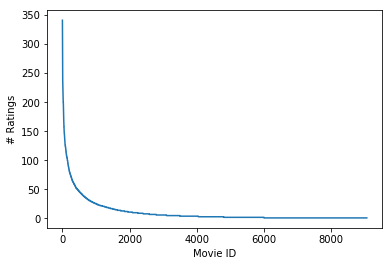

In [49]:
# Question 3
movie_ids = dataset['movieId']
movie_ratings_dict = dict(Counter(movie_ids))
plt.plot(range(0,len(movie_ratings_dict.keys())), sorted(movie_ratings_dict.values(),reverse=True))
plt.ylabel("# Ratings")
plt.xlabel("Movie ID")

Text(0.5,0,'User ID')

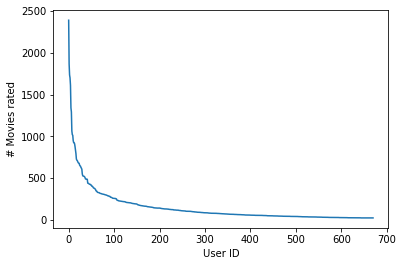

In [25]:
# Question 4
user_ids = dataset['userId']
user_ratings_dict = dict(Counter(user_ids))
plt.plot(range(0,len(user_ratings_dict.keys())), sorted(user_ratings_dict.values(),reverse=True))
plt.ylabel("# Movies rated")
plt.xlabel("User ID")

In [26]:
# Question 5
sum(sorted(user_ratings_dict.values(),reverse=True)[:100])

55141

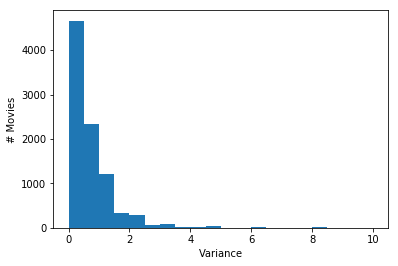

In [27]:
# Question 6
var_list = list(dataset[['movieId','rating']].groupby('movieId').var()['rating'])
plt.hist(np.nan_to_num(var_list),bins=np.arange(min(var_list), max(var_list), 0.5))
plt.xlabel("Variance")
plt.ylabel("# Movies")
plt.show()

<h2>K-NN Collaborative Filtering</h2>

In [41]:
def get_popular(movie_ratings_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>2]
    return [x for x in testset if x[1] in movie_ids]
def get_unpopular(movie_ratings_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]<=2]
    return [x for x in testset if x[1] in movie_ids]

def get_highvar(movie_ratings_dict, var_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>=5]
    movieids = [x for x in movieids if var_dict[x]>=2 ]
    return [x for x in testset if x[1] in movie_ids]

In [54]:
def do_kFold(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    sim_options = {'name': 'pearson_baseline'}
    kf = KFold(n_splits=splits)
    reader = Reader(rating_scale=(1, 5))
    mae_d={}
    rmse_d={}
    for neigh in range_:
        print('Neighbors ',neigh)
        knn_model = KNNWithMeans( k=neigh, sim_options= sim_options)
        rmse_list=[]
        mae_list =[]
        #print(data_.)
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict,id_var_dict,testset)
            knn_model.fit(trainset)
            predictions = knn_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[neigh]=sum(rmse_list)/len(rmse_list)
        mae_d[neigh]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d

In [55]:
def rmse_mae_plot(rmse_d,mae_d):
    plt.plot(list(rmse_d.keys()),list(rmse_d.values()))
    plt.show()
    plt.plot(list(mae_d.keys()),list(mae_d.values()))
    plt.show()

In [58]:
# Question 10
reader = Reader(rating_scale=(1, 5))
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
r_d,m_d = do_kFold(total_data, range(2,101,2),'notrim',movie_ratings_dict)

Neighbors  2
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearso

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.918495349063
Mean mae 0.696510615445
Neighbors  16
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.913822854591
Mean mae 0.693054712559
Neighbors  30
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
C

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.915816232059
Mean mae 0.694823693135
Neighbors  56
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.913468385597
Mean mae 0.692909265471
Neighbors  70
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
C

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.915720061011
Mean mae 0.695223660545
Neighbors  96
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

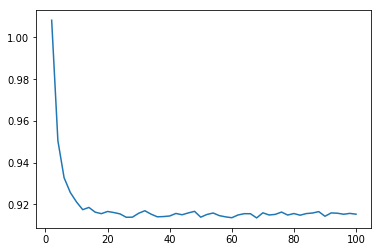

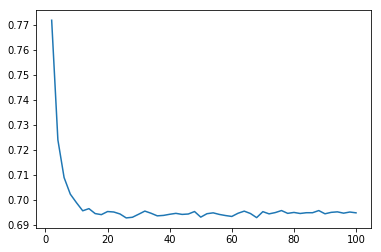

In [59]:
rmse_mae_plot(r_d,m_d)

In [60]:
# Question 11 
k value = 20 
RMSE = 0.9146735 

SyntaxError: invalid syntax (<ipython-input-60-542a037156ce>, line 2)

In [ ]:
# Question 12, 13, 14
rp_d, mp_d = do_kFold(total_data, range(2,101,2),'p',movie_ratings_dict)
rup_d,mup_d =do_kFold(total_data, range(2,101,2),'up',movie_ratings_dict)
rhv_d,mhv_d =do_kFold(total_data, range(2,101,2),'p',movie_ratings_dict,id_var_dict= id_var_dict)

In [ ]:
rmse_mae_plot(rp_d,mp_d)
rmse_mae_plot(rup_d,mup_d)
rmse_mae_plot(rhv_d,mhv_d)

In [56]:
# Question 15
# TODO

<h2>Non-Negative Matrix Factorization</h2>

In [57]:
def NMF_filter(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    kf = KFold(n_splits=splits)
    reader = Reader(rating_scale=(1, 5))
    mae_d={}
    rmse_d={}
    for latent_factors in range_:
        print('Number of Latent Factors : ',latent_factors)
        nmf_model = NMF(n_factors = latent_factors)
        rmse_list=[]
        mae_list =[]
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict,id_var_dict,testset)
            nmf_model.fit(trainset)
            predictions = nmf_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[latent_factors]=sum(rmse_list)/len(rmse_list)
        mae_d[latent_factors]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d

In [ ]:
# Question 17
reader = Reader(rating_scale=(1, 5))
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
nmf_rmse , nmf_mae = NMF_filter(total_data, range(2,51,2),'notrim',movie_ratings_dict) 

In [ ]:
rmse_mae_plot(nmf_rmse,nmf_mae)

In [ ]:
# Question 18
print("Minimum Average RMSE : ",min(nmf_rmse.values()))
print("Minimum Average MAE : ",min(nmf_mae.values()))
best_n_factors = [k for k,v in nmf_rmse.items() if v == min(nmf_rmse.values())]
best_n_factors_nmf = best_n_factors[0]
print("Best number of latent factors : ",best_n_factors_nmf)

In [ ]:
# Question 19, 20, 21
print("-----Popular Movies Testset-----")
nmf_rmse_p , nmf_mae_p = NMF_filter(total_data, range(2,51,2),'p',movie_ratings_dict) 
print("-----Unpopular Movies Testset-----")
nmf_rmse_up , nmf_mae_up = NMF_filter(total_data, range(2,51,2),'up',movie_ratings_dict) 
print("-----High Variance Movies Testset-----")
nmf_rmse_hv , nmf_mae_hv = NMF_filter(total_data, range(2,51,2),'hv',movie_ratings_dict,id_var_dict= id_var_dict)

In [ ]:
print("-----Popular Movies Testset-----")
rmse_mae_plot(nmf_rmse_p,nmf_mae_p)
print("Minimum Average RMSE : ",min(nmf_rmse_p.values()))
print("Minimum Average MAE : ",min(nmf_mae_p.values()))
print("-----Unpopular Movies Testset-----")
rmse_mae_plot(nmf_rmse_up,nmf_mae_up)
print("Minimum Average RMSE : ",min(nmf_rmse_up.values()))
print("Minimum Average MAE : ",min(nmf_mae_up.values()))
print("-----High Variance Movies Testset-----")
rmse_mae_plot(nmf_rmse_hv,nmf_mae_hv)
print("Minimum Average RMSE : ",min(nmf_rmse_hv.values()))
print("Minimum Average MAE : ",min(nmf_mae_hv.values()))

In [ ]:
def plot_roc(fpr, tpr, roc_auc, threshold_value):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for threshold value : ' + str(threshold_value))
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def plot_roc_curves(testset,preds,thresholds_arr):
    for threshold_value in thresholds_arr:
        y_test = []
        y_preds = []
        for x in testset:
            if x[2] < threshold_value:
                y_test.append(0)
            else:
                y_test.append(1)
        for i in range(len(preds)):
            y_preds.append(preds[i][3])
        fpr, tpr, thresholds = roc_curve(y_test, y_preds)
        roc_auc = auc(fpr, tpr)
        plot_roc(fpr,tpr, roc_auc,threshold_value)

In [ ]:
reader = Reader(rating_scale=(1, 5))
data_roc = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
train_set, test_set = train_test_split(data_roc, test_size = 0.1, random_state = 0)
roc_nmf_model = NMF(n_factors = 16)
roc_nmf_model.fit(train_set)
preds = roc_nmf_model.test(test_set)

In [ ]:
# Question 22
thresholds = [2.5,3,3.5,4]
plot_roc_curves(test_set,preds,thresholds)

<h2>Matrix Factorization with Bias</h2>

In [61]:
def SVD_filter(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    kf = KFold(n_splits=splits)
    reader = Reader(rating_scale=(1, 5))
    mae_d={}
    rmse_d={}
    for latent_factors in range_:
        print('Number of Latent Factors : ',latent_factors)
        svd_model = SVD(n_factors = latent_factors)
        rmse_list=[]
        mae_list =[]
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict, id_var_dict, testset)
            svd_model.fit(trainset)
            predictions = svd_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[latent_factors]=sum(rmse_list)/len(rmse_list)
        mae_d[latent_factors]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d

In [62]:
# Question 24
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
svd_rmse , svd_mae = SVD_filter(total_data, range(2,51,2),'notrim',movie_ratings_dict)

Number of Latent Factors :  2
Mean rmse 0.888015997158
Mean mae 0.68411998605
Number of Latent Factors :  4
Mean rmse 0.88763693131
Mean mae 0.683436062208
Number of Latent Factors :  6
Mean rmse 0.888100417863
Mean mae 0.683683471058
Number of Latent Factors :  8
Mean rmse 0.887288113148
Mean mae 0.683422503113
Number of Latent Factors :  10
Mean rmse 0.888432028426
Mean mae 0.684218134787
Number of Latent Factors :  12
Mean rmse 0.887053039764
Mean mae 0.682704565109
Number of Latent Factors :  14
Mean rmse 0.887500842143
Mean mae 0.682893767432
Number of Latent Factors :  16
Mean rmse 0.888842300996
Mean mae 0.683980870472
Number of Latent Factors :  18
Mean rmse 0.887757922593
Mean mae 0.683645759324
Number of Latent Factors :  20
Mean rmse 0.887637307769
Mean mae 0.683203763295
Number of Latent Factors :  22
Mean rmse 0.886496734559
Mean mae 0.682270622258
Number of Latent Factors :  24
Mean rmse 0.888070114812
Mean mae 0.683704682541
Number of Latent Factors :  26
Mean rmse 0.887

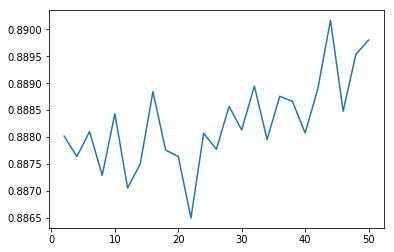

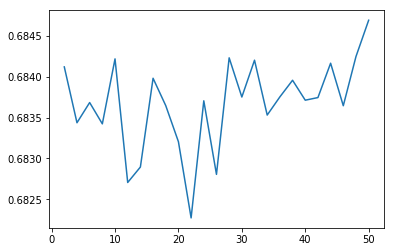

In [63]:
rmse_mae_plot(svd_rmse,svd_mae)

In [64]:
# Question 25
print("Minimum Average RMSE : ",min(svd_rmse.values()))
print("Minimum Average MAE : ",min(svd_mae.values()))
best_n_factors = [k for k,v in svd_rmse.items() if v == min(svd_rmse.values())]
best_n_factors_svd = best_n_factors[0]
print("Best number of latent factors : ",best_n_factors_svd)

Minimum Average RMSE :  0.886496734559
Minimum Average MAE :  0.682270622258
Best number of latent factors :  22


In [65]:
# Question 26, 27, 28
print("-----Popular Movies Testset-----")
svd_rmse_p , svd_mae_p = SVD_filter(total_data, range(2,51,2),'p',movie_ratings_dict) 
print("-----Unpopular Movies Testset-----")
svd_rmse_up , svd_mae_up = SVD_filter(total_data, range(2,51,2),'up',movie_ratings_dict) 
print("-----High Variance Movies Testset-----")
svd_rmse_hv , svd_mae_hv = SVD_filter(total_data, range(2,51,2),'hv',movie_ratings_dict, id_var_dict=id_var_dict)

-----Popular Movies Testset-----
Number of Latent Factors :  2
Mean rmse 0.887181806907
Mean mae 0.683311897238
Number of Latent Factors :  4
Mean rmse 0.887174552216
Mean mae 0.682900636704
Number of Latent Factors :  6
Mean rmse 0.88767483221
Mean mae 0.683493836549
Number of Latent Factors :  8
Mean rmse 0.886654083851
Mean mae 0.682304996883
Number of Latent Factors :  10
Mean rmse 0.887350658371
Mean mae 0.682474086128
Number of Latent Factors :  12
Mean rmse 0.887348684271
Mean mae 0.682977594474
Number of Latent Factors :  14
Mean rmse 0.887370642195
Mean mae 0.682719797651
Number of Latent Factors :  16
Mean rmse 0.886710969614
Mean mae 0.682551918786
Number of Latent Factors :  18
Mean rmse 0.886797834732
Mean mae 0.682505550053
Number of Latent Factors :  20
Mean rmse 0.887139286627
Mean mae 0.681729920038
Number of Latent Factors :  22
Mean rmse 0.887938588527
Mean mae 0.683006959914
Number of Latent Factors :  24
Mean rmse 0.886961620441
Mean mae 0.682372526615
Number of La

-----Popular Movies Testset-----


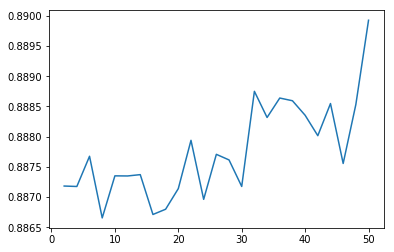

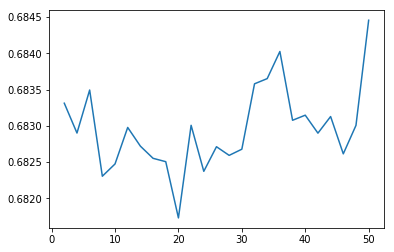

Minimum Average RMSE :  0.886654083851
Minimum Average MAE :  0.681729920038
-----Unpopular Movies Testset-----


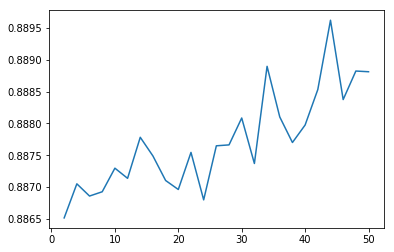

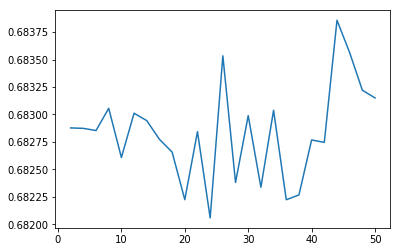

Minimum Average RMSE :  0.886514844126
Minimum Average MAE :  0.682057488212
-----High Variance Movies Testset-----


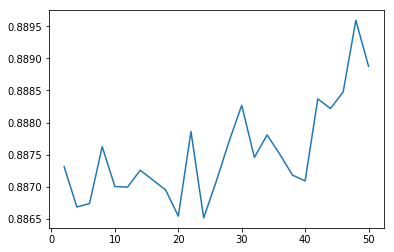

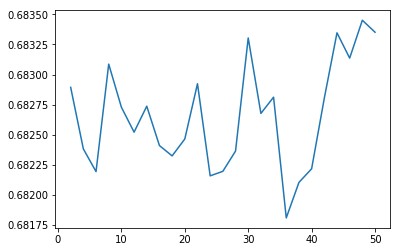

Minimum Average RMSE :  0.886516934102
Minimum Average MAE :  0.681808704201


In [66]:
print("-----Popular Movies Testset-----")
rmse_mae_plot(svd_rmse_p,svd_mae_p)
print("Minimum Average RMSE : ",min(svd_rmse_p.values()))
print("Minimum Average MAE : ",min(svd_mae_p.values()))
print("-----Unpopular Movies Testset-----")
rmse_mae_plot(svd_rmse_up,svd_mae_up)
print("Minimum Average RMSE : ",min(svd_rmse_up.values()))
print("Minimum Average MAE : ",min(svd_mae_up.values()))
print("-----High Variance Movies Testset-----")
rmse_mae_plot(svd_rmse_hv,svd_mae_hv)
print("Minimum Average RMSE : ",min(svd_rmse_hv.values()))
print("Minimum Average MAE : ",min(svd_mae_hv.values()))

In [67]:
# Question 29
data_roc = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
train_set, test_set = train_test_split(data_roc, test_size = 0.1, random_state = 0)
roc_svd_model = SVD(n_factors = best_n_factors_svd)
roc_svd_model.fit(train_set)
preds = roc_svd_model.test(test_set)
thresholds = [2.5,3,3.5,4]
plot_roc_curves(test_set,preds,thresholds)

NameError: name 'plot_roc_curves' is not defined

In [28]:
id_var = (dataset[['movieId','rating']].groupby('movieId',as_index=False)).var().fillna(0)
id_var_dict = dict(zip(list(id_var['movieId']), id_var['rating']))

In [29]:
popular_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>2]
unpopular_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]<=2]
high_variance_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>=5]
high_variance_movieids = [x for x in high_variance_movieids if id_var_dict[x]>=2 ]

In [30]:
popular_movie_dataset = dataset.loc[dataset['movieId'].isin(popular_movieids)]
unpopular_movie_dataset = dataset.loc[dataset['movieId'].isin(unpopular_movieids)]
highvar_movie_dataset = dataset.loc[dataset['movieId'].isin(high_variance_movieids)]

In [31]:
def get_popular_dataset(testset):
    popular_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>2]
    popular_movie_dataset = dataset.loc[dataset['movieId'].isin(popular_movieids)]
    return popular_movie_dataset

def get_unpopular_dataset(testset):
    unpopular_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]<=2]
    unpopular_movie_dataset = dataset.loc[dataset['movieId'].isin(unpopular_movieids)]
    return unpopular_movie_dataset

def get_highvar_dataset(testset):
    high_variance_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>=5]
    high_variance_movieids = [x for x in high_variance_movieids if id_var_dict[x]>=2 ]
    highvar_movie_dataset = dataset.loc[dataset['movieId'].isin(high_variance_movieids)]
    return highvar_movie_dataset

<h2>Part 6</h2>

In [32]:
from sklearn.model_selection import KFold

In [33]:
# Function that returns mean rating of the user
def mean_rating(user):
    user_dataset = dataset.loc[dataset['userId'] == user]
    l = len(user_dataset)
    rating_sum = np.sum(user_dataset['rating'])
    return rating_sum/l

In [34]:
mean_rating(1)

2.5499999999999998

In [35]:
def rmse(preds, true_vals):
    change = preds-true_vals
    rms = np.sqrt(np.sum(c*c for c in change))
    return rms/len(preds)

In [36]:
def naive_cf(df, subset):
    error = []
    for i in range(10):
        kf = KFold(n_splits = 10, shuffle = True, random_state = 2)
        result = next(kf.split(df), None)
        train = df.iloc[result[0]]
        test =  df.iloc[result[1]]
        if subset == 'entire':
            test2 = test
        if subset == 'popular':
            test2 = get_popular_dataset(test)
        if subset == 'unpopular':
            test2 = get_unpopular_dataset(test)
        if subset == 'highvar':
            test2 = get_highvar_dataset(test)
        predictions = [mean_rating(i) for i in test2['userId']]
        error.append(rmse(predictions, test2['rating']))
    print("RMSE 10-fold cross validation: ", np.sum(error)/10)

In [37]:
# Question 30
print("Entire dataset")
naive_cf(dataset, "entire")

Entire dataset
RMSE 10-fold cross validation:  0.00945855717302


In [38]:
# Question 31
print("Popular movie dataset")
naive_cf(dataset, "popular")

Popular movie dataset
RMSE 10-fold cross validation:  0.00309672353362


In [39]:
# Question 32
print("Unpopular movie dataset")
naive_cf(dataset, "unpopular")

Unpopular movie dataset
RMSE 10-fold cross validation:  0.0136684295982


In [40]:
# Question 33
print("High variance movie dataset")
naive_cf(dataset, "highvar")

High variance movie dataset
RMSE 10-fold cross validation:  0.0485738386232


In [68]:
user_ids = dataset['userId'].unique()

In [69]:
user_movie_rating = dataset[['userId', 'movieId', 'rating']].fillna(0)

In [70]:
user_movie_rating_new = user_movie_rating[user_movie_rating.rating > 3]   # threshold for ground truth values = 3

In [71]:
user_movie_rating_new['movieId'].nunique()

6993

In [72]:
user_movies_dict = {}  # ground truth values for users
for uid in user_ids:
    df = user_movie_rating_new[user_movie_rating_new.userId == uid]
    if uid in user_movies_dict:
        user_movies_dict[uid].append(df.movieId)
    else:
        user_movies_dict[uid] = df.movieId

In [73]:
user_movies_dict = {k: v for k, v in user_movies_dict.items() if len(v) != 0}  # removes users with 0 ratings

In [74]:
def getPrecision(recommendations, uid, user_movies_dict=user_movies_dict):
    rec_common = [x for x in recommendations if x in user_movies_dict[uid]]
    precision = float(len(rec_common)/len(recommendations))
    return precision

def getRecall(recommendations, uid, user_movies_dict=user_movies_dict):
    rec_common = [x for x in recommendations if x in user_movies_dict[uid]]
    recall = float(len(rec_common)/len(user_movies_dict[uid]))
    return recall

In [94]:
from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

def getS_KNN(trainset, testset, t):
    sim_options = {'name': 'pearson_baseline'}
    algo = KNNWithMeans(k=20, sim_options=sim_options)   # k = 20 (from Q11)
    algo.fit(trainset)
    # Than predict ratings for all pairs (u, i) that are NOT in the training set.
    predictions = algo.test(testset)
    top_n = get_top_n(predictions, n=t)
    
    S = {}
    # Recommended items for each user
    for uid, user_ratings in top_n.items():
        S[uid] = [iid for (iid, _) in user_ratings]
    return S

def getS_NNMF(trainset, testset, t):
    algo = NMF(n_factors = 16)     # Best number . of latent factors = 16
    algo.fit(trainset)
    # Than predict ratings for all pairs (u, i) that are NOT in the training set.
    predictions = algo.test(testset)
    top_n = get_top_n(predictions, n=t)
    
    S = {}
    # Recommended items for each user
    for uid, user_ratings in top_n.items():
        S[uid] = [iid for (iid, _) in user_ratings]
    return S

def getS_MF(trainset, testset, t):
    algo = SVD(n_factors = 2)   # Best number of latent factors = 2
    algo.fit(trainset)
    # Than predict ratings for all pairs (u, i) that are NOT in the training set.
    predictions = algo.test(testset)
    top_n = get_top_n(predictions, n=t)
    
    S = {}
    # Recommended items for each user
    for uid, user_ratings in top_n.items():
        S[uid] = [iid for (iid, _) in user_ratings]
    return S

In [95]:
from surprise.model_selection import KFold

def precision_recall(tvals, algo):
    avg_precision_t = []
    avg_recall_t = []
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(user_movie_rating_new[['userId','movieId','rating']], reader)
    kf = KFold(n_splits=10)
    for t in tvals:
        precisions = []
        recalls = []
        for trainset, testset in kf.split(data):
            user_precisions = []
            user_recalls = []
            if algo == 'knn':
                S = getS_KNN(trainset, testset, t)
            if algo == 'nnmf':
                S = getS_NNMF(trainset, testset, t)
            if algo == 'mf':
                S = getS_MF(trainset, testset, t)
            
            uids = [x[0] for x in testset]
            for uid in uids:
                user_precisions.append(getPrecision(S[uid], uid))
                user_recalls.append(getRecall(S[uid], uid))
            
            fold_precision = sum(user_precisions)/len(user_precisions)
            fold_recall = sum(user_recalls)/len(user_recalls)
            precisions.append(fold_precision)
            recalls.append(fold_recall)
        precision_t = sum(precisions)/len(precisions)
        recall_t = sum(recalls)/len(recalls)
        avg_precision_t.append(precision_t)
        avg_recall_t.append(recall_t)
    return avg_precision_t, avg_recall_t

In [79]:
tvals = range(1,25,1)

In [85]:
precision_knn, recall_knn = precision_recall(tvals, "knn")

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

In [98]:
def plot_func(x, y, xlabel, ylabel, title):
    plt.figure()
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

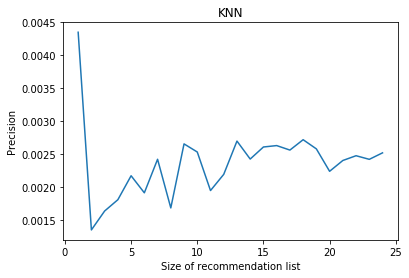

In [99]:
plot_func(tvals, precision_knn, "Size of recommendation list", "Precision", "KNN")

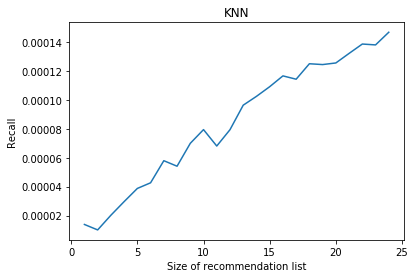

In [100]:
plot_func(tvals, recall_knn, "Size of recommendation list", "Recall", "KNN")

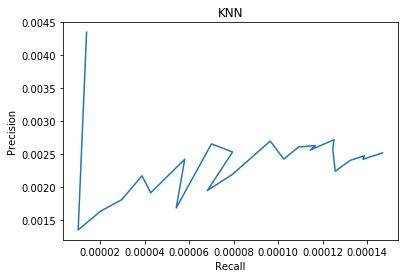

In [101]:
plot_func(recall_knn, precision_knn, "Recall", "Precision", "KNN")

In [102]:
precision_nnmf, recall_nnmf = precision_recall(tvals, "nnmf")

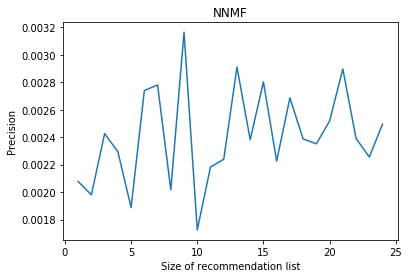

In [103]:
plot_func(tvals, precision_nnmf, "Size of recommendation list", "Precision", "NNMF")

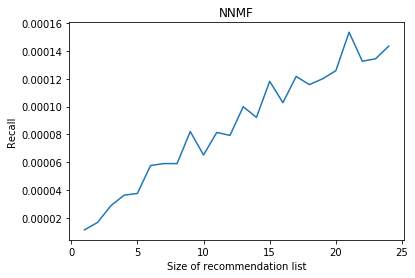

In [104]:
plot_func(tvals, recall_nnmf, "Size of recommendation list", "Recall", "NNMF")

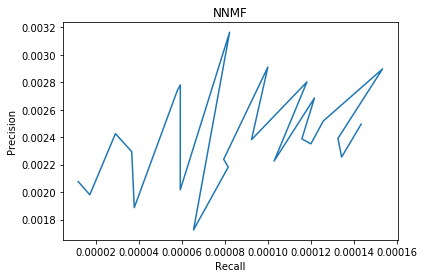

In [105]:
plot_func(recall_nnmf, precision_nnmf, "Recall", "Precision", "NNMF")

In [106]:
precision_mf, recall_mf = precision_recall(tvals, "mf")

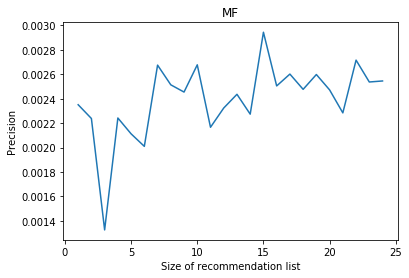

In [107]:
plot_func(tvals, precision_mf, "Size of recommendation list", "Precision", "MF")

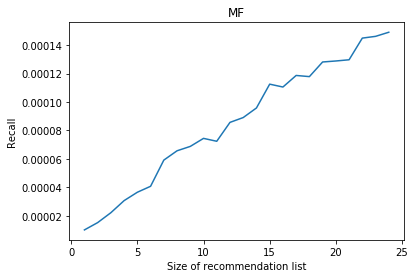

In [108]:
plot_func(tvals, recall_mf, "Size of recommendation list", "Recall", "MF")

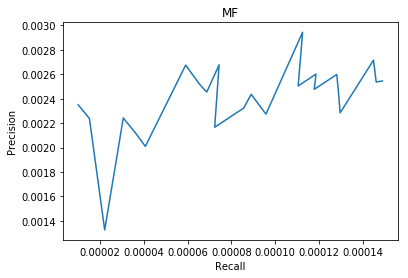

In [109]:
plot_func(recall_mf, precision_mf, "Recall", "Precision", "MF")